Amanda Rudolph

Claire Weadock

In [60]:
import pandas as pd
from pandas import read_csv
import re
import json
import bz2
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from matplotlib import cm

## Data Gathering & Initial Steps

Originally, we chose to use Twitter data and Yelp data to analyze the reviews of the top 10 most reviewed restaurants. We planned to search Twitter to analyze the sentiment, as well as collect the number of tweets about that particular restuant. Based on the sentiment of the twitter reviews, we would compae the rating to the average Yelp score (star rating) and analyze whether Twitter is a good predictor of the rating of a restaruant. 

Gathering the Twitter data consisted of searching for tweets that contained the search terms of the top 10 most reviewed restraunts in Madison, WI. However, after reviewing this collected data the tweets did not correspond with restaurant reviews like we had hope.

Although we had this setback, we chose to keep using the Yelp dataset (since we still wanted to focus on reviews) and thought it would be interesting to focus on the factors that influence high, low, and neutral revews. So, we left the Twitter dataset behind and brought in a Crime DataSet. 

## Does the safety of an area a business is in have any relation to that restaurants review?

**Do restaurants in "safer" areas have higher reviews?**

-To narrow our scope, we chose to focus on restuarants and crime rates in Boston.

## Boston Crime DataSet (CSV)

This Boston Crime Dataset comes from the 2020 Crime Incident Reports. The dataset contains records which include a reduced set of fields focused on capturing the type of incident as well as when and where it ocurred. 

In [4]:
data = pd.read_csv('BostonCrime.csv')

/opt/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Yelp DataSet (JSON)

The Yelp DataSet contains filed composed of one JSON-object-per-line. For this project, we used the business.json file as it contains business data including location data, attributes, star ratings, and categories.

In [6]:
#CLAIRE NEEDS TO DO THIS BC JSON FILE
yelp = pd.read_csv('yelp_boston_businesses.csv')

## **Data Cleaning**

- Read in Yelp Business JSON line by line and clean it to only contain the data from businesses in Boston, MA. Convert the JSON file into a csv, and then into a pandas dataframe. Then unnneeded columns were removed from the dataframe.


In [7]:
yelp = yelp[['name', 'address', 'city', 'state', 'latitude', 'longitude', 'stars', 'review_count', 'categories', 'Location']]

KeyError: "['Location'] not in index"

- Read in Boston Crime DataSet by converting CSV file to pandas dataframe and remove unneeded columns.

In [8]:
df_crime_filtered = data[['OFFENSE_DESCRIPTION', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'Lat', 'Long', 'Location']]
df_crime_filtered

,OFFENSE_DESCRIPTION,YEAR,MONTH,DAY_OF_WEEK,Lat,Long,Location
0,INVESTIGATE PERSON,2020,2,Thursday,42.333679,-71.091878,"(42.3336792181085, -71.0918775461846)"
1,INVESTIGATE PERSON,2020,2,Friday,42.333679,-71.091878,"(42.3336792181085, -71.0918775461846)"
2,FRAUD - CREDIT CARD / ATM FRAUD,2020,4,Friday,42.339542,-71.069409,"(42.3395419898301, -71.0694087696754)"
3,FRAUD - WELFARE,2020,5,Friday,42.370818,-71.039291,"(42.3708180467024, -71.0392907813515)"
4,HARASSMENT/ CRIMINAL HARASSMENT,2020,9,Monday,42.361839,-71.059765,"(42.3618385665647, -71.0597648909416)"
...,...,...,...,...,...,...,...
70889,INVESTIGATE PROPERTY,2020,9,Tuesday,42.374427,-71.035279,"(42.3744269722053, -71.0352787630199)"
70890,FRAUD - IMPERSONATION,2020,8,Friday,42.256216,-71.124019,"(42.2562159204022, -71.1240194732902)"
70891,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,2020,7,Thursday,42.305761,-71.083772,"(42.3057609263196, -71.0837715727385)"
70892,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,2020,6,Wednesday,42.323808,-71.089150,"(42.3238077563779, -71.0891502345332)"


## Data Manipulation

- Although we cleaned the Yelp dataset to contain specifically business in Boston and chose the corresponsing Boston Crime DataSet, we still wanted to specify areas within Boston to find the crime rates of areas that the restaurants in our Yelp dataset were in. 
    - One way to do this was by cleaning the Boston Crime Data to contain a 'Postal Code' column instead of lattitude on longtitude columns. This way, we could merge with Crime data with the Yelp data (which has a postal code column) and group by postal code to compare crime rates of different areas of boston and the ratings of those corresponding restaurants.

### <font color="blue"> Function to find Postal Code

Insert all the work that was done to get the zipcode here!!

### <font color="blue"> Determining areas by Coordinate
After trying to get the postal code from the lattitude and longitude data and not succeeding, we decided to take a different approach to narrowing down areas of Boston and groupby coordinate pair. 
    
 - Since coordinates are so specific, we used Regular Expressions to shorten them to only 3 decimals so that it would be easier to group by coordinate pairs and come up with area groups

In [9]:
def get_lat(series):
    pattern = r'(-?\d{2}.\d{3})'
    lat = re.match(pattern, str(series))
    if lat is not None:
        return lat.group(0)
    else:
        return str(series)[0:6]

def get_long(series):
    pattern = r'(-?\d{2}.\d{3})'
    long = re.match(pattern, str(series))
    if long is not None:
        return long.group(0)
    else:
        return str(series)[0:6]

#Replacing the 'Lat' and 'Long' values within Boston Crime df with their new, shortened coordinates.
df_crime_filtered['Lat'] = df_crime_filtered['Lat'].map(get_lat)
df_crime_filtered['Long'] = df_crime_filtered['Long'].map(get_long)

/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [10]:
#Replacing the location column of the DataFrame to hold new coordinate pairs.
def replace_location(df):
    return (df['Lat'], df['Long'])

df_crime_filtered['Location'] = df_crime_filtered.apply(replace_location, axis=1)

/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [11]:
#Now cleaning the Yelp datset using the get_lat and get_long functions
yelp['latitude'] = yelp['latitude'].apply(get_lat)
yelp['longitude'] = yelp['longitude'].apply(get_long)

def replace_location_yelp(yelp):
    return (yelp['latitude'], yelp['longitude'])

yelp['Location'] = yelp.apply(replace_location_yelp, axis=1)

### <font color="blue"> Group Boston Crime DF by location

In [12]:
crimes_by_location = df_crime_filtered.groupby('Location').size().reset_index(name="Crimes in Business Area")
crimes_by_location = pd.DataFrame(crimes_by_location)
crimes_by_location

,Location,Crimes in Business Area
0,"(0.0, 0.0)",1747
1,"(1.3272, 5.2496)",1
2,"(42.232, -71.130)",1
3,"(42.232, -71.131)",2
4,"(42.233, -71.128)",8
...,...,...
6408,"(42.393, -71.010)",3
6409,"(42.393, -71.011)",30
6410,"(42.394, -71.010)",1
6411,"(42.394, -71.067)",12


### <font color="blue"> Merging with Yelp dataframe

In [13]:
yelp = yelp[['name', 'address', 'city', 'state', 'latitude', 'longitude', 'stars', 'review_count', 'categories', 'Location']]

In [26]:
merging_crimecount_and_yelp = yelp.merge(crimes_by_location, how="outer")
merging_crimecount_and_yelp = merging_crimecount_and_yelp.dropna()
merging_crimecount_and_yelp.head()

,name,address,city,state,latitude,longitude,stars,review_count,categories,Location,Crimes in Business Area
0,Longwood Galleria,340-350 Longwood Ave,Boston,MA,42.338,-71.106,2.5,24.0,"Restaurants, Shopping, Shopping Centers","(42.338, -71.106)",15.0
1,Longwood Barbershop,342 Longwood Ave,Boston,MA,42.338,-71.106,4.0,37.0,"Barbers, Beauty & Spas","(42.338, -71.106)",15.0
2,Sakura,350 Longwood Ave,Boston,MA,42.338,-71.106,3.0,9.0,"Fast Food, Japanese, Restaurants","(42.338, -71.106)",15.0
3,Noodles King,400 Brookline Ave,Boston,MA,42.338,-71.106,4.0,36.0,"Chinese, Food Court, Restaurants, Noodles","(42.338, -71.106)",15.0
4,Dairy Queen,350 Longwood Ave,Boston,MA,42.338,-71.106,3.0,6.0,"Food, Ice Cream & Frozen Yogurt","(42.338, -71.106)",15.0


### <font color="blue"> Group Merged DataFrame by Location

This merged dataframe shows the average star ratings as well as the average amount of reviews given for resturants in these location areas.

In [31]:
group_by_location = merging_crimecount_and_yelp.groupby('Location').mean()
group_by_location[['stars', 'review_count']]

,stars,review_count
Location,,
"(42.239, -71.138)",5.00,11.0
"(42.244, -71.132)",4.50,13.0
"(42.248, -71.131)",4.50,25.0
"(42.251, -71.128)",5.00,6.0
"(42.251, -71.130)",4.25,19.5
...,...,...
"(42.390, -71.005)",5.00,20.0
"(42.391, -71.012)",2.50,7.0
"(42.391, -71.013)",3.50,11.0


### <font color="blue"> What restaurants are in areas with the highest amounts of crime?

In [32]:
merging_crimecount_and_yelp.sort_values('Crimes in Business Area', ascending=False).head()

,name,address,city,state,latitude,longitude,stars,review_count,categories,Location,Crimes in Business Area
7895,Boston Police Department,650 Harrison Ave,Boston,MA,42.339,-71.069,2.0,20.0,Public Services & Government,"(42.339, -71.069)",2283.0
5680,Kabloom,27 School St,Boston,MA,42.361,-71.059,2.0,6.0,"Florists, Flowers & Gifts, Shopping","(42.361, -71.059)",1671.0
7179,Michael's Sports Massage,"17 Henshaw St, Ste 2B",Boston,MA,42.349,-71.150,4.5,16.0,"Massage Therapy, Sports Medicine, Massage, Doc...","(42.349, -71.150)",1368.0
6488,Salon 120 West,120 W Broadway,Boston,MA,42.341,-71.054,4.5,7.0,"Hair Salons, Beauty & Spas","(42.341, -71.054)",1232.0
6487,Simply Barre,118 W Broadway S,Boston,MA,42.341,-71.054,4.5,21.0,"Fitness & Instruction, Barre Classes, Active Life","(42.341, -71.054)",1232.0


### <font color="blue"> What restaurants are in areas with the lowest amounts of crime?

In [33]:
merging_crimecount_and_yelp.sort_values('Crimes in Business Area', ascending=True).head()

,name,address,city,state,latitude,longitude,stars,review_count,categories,Location,Crimes in Business Area
3421,Starbucks,443 Boylston St,Boston,MA,42.351,-71.072,3.0,73.0,"Coffee & Tea, Food, Desserts","(42.351, -71.072)",1.0
1912,"Marc L Nevins, DMD MMSc PC","3 Center Plz, Ste 310",Boston,MA,42.360,-71.060,4.5,24.0,"Cosmetic Dentists, Health & Medical, Trainers,...","(42.360, -71.060)",1.0
7532,USS Cassin Young,Charlestown Navy Yard,Boston,MA,42.379,-71.051,4.5,27.0,"Arts & Entertainment, Museums","(42.379, -71.051)",1.0
7541,Angela's Cafe - Orient Heights,1012 Bennington St,Boston,MA,42.387,-71.006,4.0,101.0,"Food, Desserts, Restaurants, Breakfast & Brunc...","(42.387, -71.006)",1.0
1960,Tawakal Halal Cafe,389 Maverick St,Boston,MA,42.365,-71.029,5.0,97.0,"African, Halal, Cafes, Somali, Restaurants","(42.365, -71.029)",1.0


## Data Reporting

<font color="blue"> *For busineses in areas with highest amounts of crime

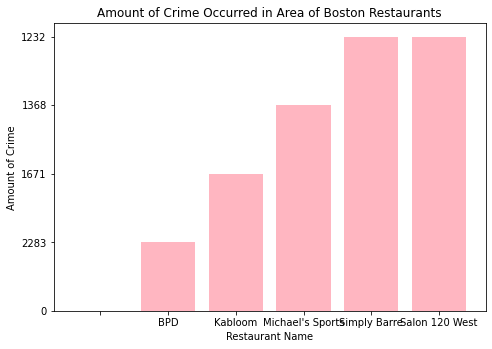

In [52]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
restaurants = ['','BPD', 'Kabloom', "Michael's Sports", 'Simply Barre', 'Salon 120 West']
amount_of_crime_in_area = ['0','2283', '1671', '1368', '1232', '1232']
ax.bar(restaurants, amount_of_crime_in_area, color='lightpink')
ax.set_title('Amount of Crime Occurred in Area of Boston Business')
ax.set_xlabel('Business Name')
ax.set_ylabel('Amount of Crime in Business Area')
plt.show()

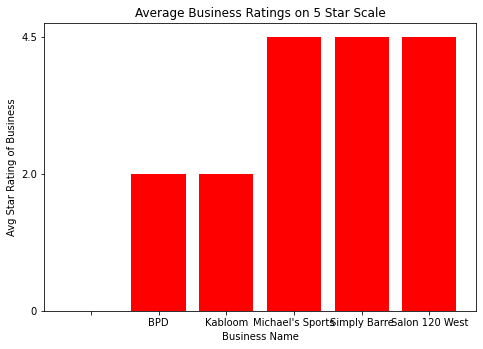

In [58]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
restaurants = ['','BPD', 'Kabloom', "Michael's Sports", 'Simply Barre', 'Salon 120 West']
star_rating = ['0','2.0', '2.0', '4.5', '4.5', '4.5']
ax.bar(restaurants, star_rating, color='red')
ax.set_title('Average Business Ratings on 5 Star Scale')
ax.set_xlabel('Business Name')
ax.set_ylabel('Avg Star Rating of Business')
plt.show()

<font color="blue"> *For resturants in areas with lowest amounts of crime

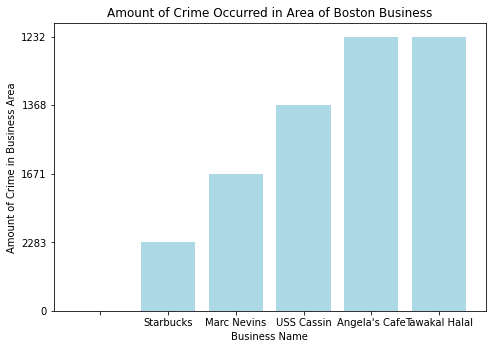

In [55]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
restaurants = ['','Starbucks', 'Marc Nevins', "USS Cassin", "Angela's Cafe", 'Tawakal Halal']
amount_of_crime_in_area = ['0','2283', '1671', '1368', '1232', '1232']
ax.bar(restaurants, amount_of_crime_in_area, color='lightblue')
ax.set_title('Amount of Crime Occurred in Area of Boston Business')
ax.set_xlabel('Business Name')
ax.set_ylabel('Amount of Crime in Business Area')
plt.show()

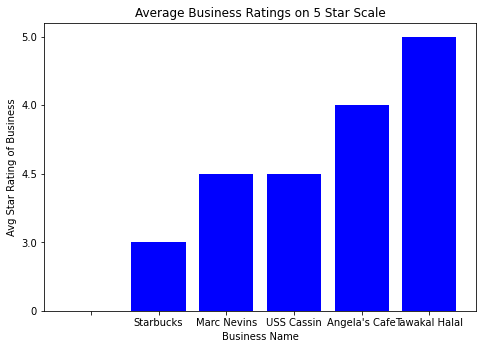

In [59]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
restaurants = ['','Starbucks', 'Marc Nevins', "USS Cassin", "Angela's Cafe", 'Tawakal Halal']
star_rating = ['0','3.0', '4.5', '4.5', '4.0', '5.0']
ax.bar(restaurants, star_rating, color='blue')
ax.set_title('Average Business Ratings on 5 Star Scale')
ax.set_xlabel('Business Name')
ax.set_ylabel('Avg Star Rating of Business')
plt.show()

## Time and Space Reporting

Requirements for this section:


    - List file size in bytes
    
    -Detail the most computationally expensive part of the project 
    
    -List all required dataserts and their siz in a meaningful format 
    
    -detail the most computationally expensive operation clearly
    
    -to recieve top marks all efforts to speed up the most computationl expensive operaton must be detailed

## Next Steps